## Introduzione ad Altair

Altair e una libreria **dichiarativa** per la visualizzazione dei dati. 

Per **dichiarativa** si intende che, ai fine della creazione di un grafico, l'utente non deve far altro che *dichiarare* un collegamento fra campi nei dati (colonne, attributi) e proprieta grafiche della visualizzazione. 

Questo processo avviene *dichiarando* cosa si vuole visualizzare in termini di *simbolo*, *dati*, *canali di codifica*. Dove:
- **simbolo**: simbolo (punto, barra...) associato ad ognuna delle entrate del dataset,
- **dati**: il dataset che vogliamo visualizzare,
- **canali di codifica**: metodi con i quali e possibile dichiarare un collegamento (*mappa*) tra proprieta grafiche (colore, forma, assi) e colonne del dataset.

L'idea fondamentale dietro alle librerie moderne di visualizzazione e quella di implementare una **grammar of graphics**. 

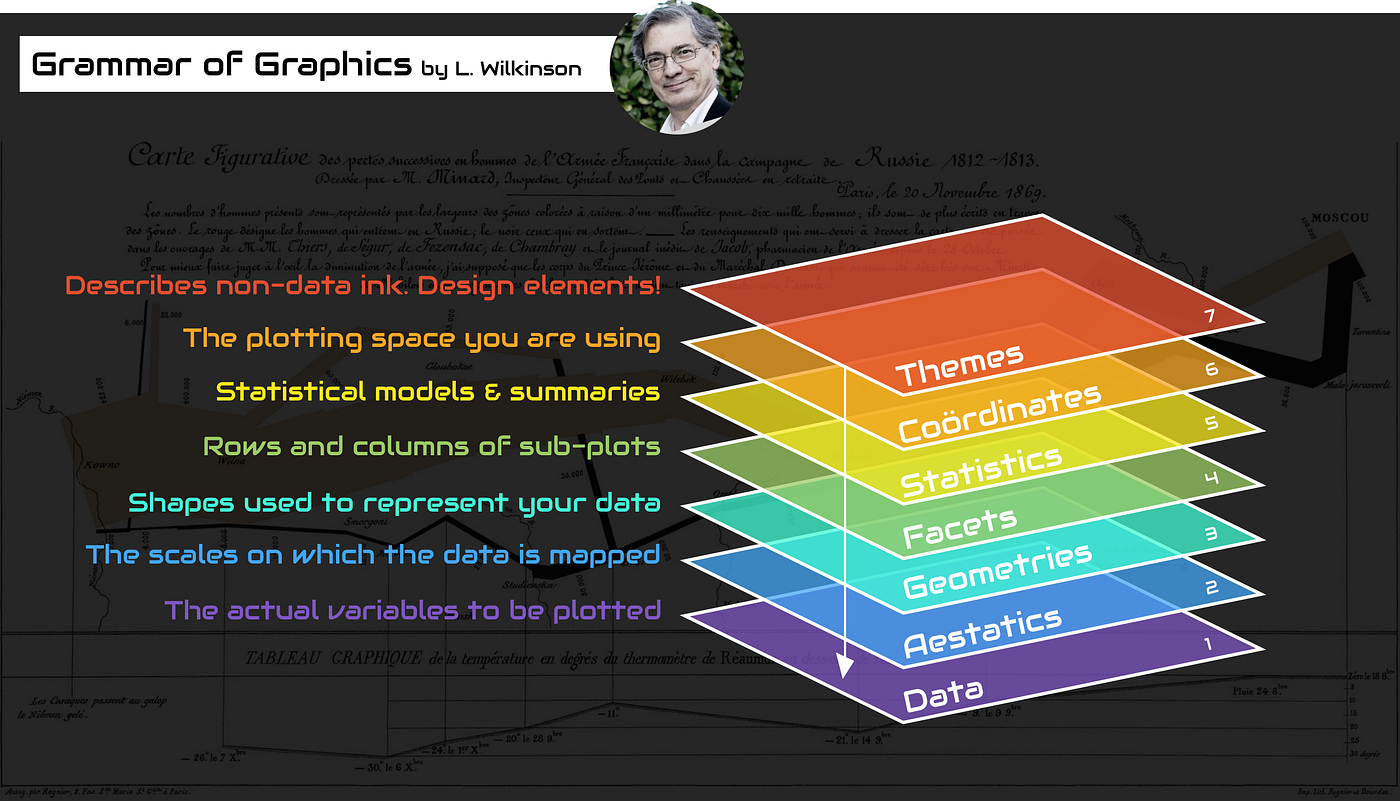

Esempio di grafico con Altair (statico , interattivo)

In [2]:
# import altair with an abbreviated alias
import altair as alt

# load a sample dataset as a pandas DataFrame
from altair.datasets import data
cars = data.cars()

# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

### 💊 Altair in pillole

Altair si basa sui Pandas Dataframe. 

In [40]:
import pandas as pd
data = pd.DataFrame({'a': list('CCCDDDEEE'), 'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]}) 
data

,a,b
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2
5,D,6
6,E,8
7,E,4
8,E,7


L'oggetto fondamentale del pacchetto e il chart che prende come input un DataFrame. 

In [4]:
import altair as alt 
alt.Chart(data)

SchemaValidationError: '{'data': {'name': 'data-9b610f80003d046838adda5e50d859e9'}}' is an invalid value.

'mark' is a required property

alt.Chart(...)

#### 🔣 Simbolo e Codifica 

In questo modo abbiamo definito il nostro grafico, ma non abbiamo **dichiarato** come lavorare con i dati. 

A questo punto dobbiamo scegliere un **simbolo** con il quale i nostri dati saranno visualizzati. In questo caso prendiamo un **punto**. 

In [5]:
alt.Chart(data).mark_point()

alt.Chart(...)

Successivamente possiamo specificare delle **mappe** fra proprieta del grafico (x,y,colore, forma del punto, dimensione del punto) e valori presenti nel dataset (le colonne del **dataframe**). 

In [6]:
alt.Chart(data).mark_point().encode(
    alt.X('a'),
)

alt.Chart(...)

In [7]:
alt.Chart(data).mark_point().encode(
    alt.X('a'),
    alt.Y('b')
)

alt.Chart(...)

Inoltre con *Altair* possiamo dichiarare anche delle operazioni sui dati che poi andremo a visualizzare. Ad esempio: 

In [8]:
alt.Chart(data).mark_point().encode(
    alt.X('a'),
    alt.Y('average(b)'),
)

alt.Chart(...)

Se volessimo ottenere un istogramma, lo possiamo fare sostituendo il tipo di **simbolo** (*mark*) associato alla visualizzazione di un dato. In questo caso non dobbiamo far altro che sostituire il simbolo *punto* con il simbolo *barra*. 

In [9]:
alt.Chart(data).mark_bar().encode(
    alt.X('a'),
    alt.Y('average(b)'),
)

alt.Chart(...)

Altair e pieno di notazioni semplificate per le sue funzioni. Prima abbiamo scritto: 

```Python
alt.Y('average(b)')
```
Il codice esteso equivalente a questo snippet e: 
```Python
alt.Y('b', type = 'quantitave', aggregate = 'average')
```

Un'altra osservazione importante e che il tipo (`type`) del dato viene automaticamente inferito da Altair nel caso in cui si vogliano visualizzare i dati presenti in un DataFrame di *pandas* e non altrimenti. In questo caso dovremmo manualmente specificare il tipo di dato con una delle seguenti notazioni: 
```Python
alt.Y('b:Q')
alt.Y('b', type = 'quantitative')
```

In [10]:
# pandas riconosce automaticamente il tipo di dato 
data.dtypes

a    object
b     int64
dtype: object

In [11]:
# Altair inferisce di dover calcolare la media del valore b da mostrare sul chart
alt.Chart(data).mark_bar().encode(
    alt.X('a'),
    alt.Y('b'),
)

alt.Chart(...)

In [12]:
# istogramma a barre orizzontali
alt.Chart(data).mark_bar().encode(
    alt.Y('a'),
    alt.X('average(b)'),
)

alt.Chart(...)

#### 🖌️ Personalizzazione del grafico

Di default *Altair* opera delle scelte sullo stile della visualizzazione, che pero possono essere specificatee diversamente dall'utente. 

In [13]:
# aggiunta di un nome per gli assi, colore personalizzato per le barre 
alt.Chart(data).mark_bar(color='firebrick').encode(
    alt.Y('a').title('category'),
    alt.X('average(b)').title('avg(b) by category')
)

alt.Chart(...)

#### 💾 Salvataggio del Grafico

Una volta che il nostro grafico e completo non rimane altro da fare che salvarlo. 

In [14]:
chart = alt.Chart(data).mark_bar(color='firebrick').encode(
    alt.Y('a').title('category'),
    alt.X('average(b)').title('avg(b) by category')
)
chart.save('chart.html')

#### 🛻 Esempio  

In questo sezione, come esempio, ricostruiremo passo per passo il grafico che abbiamo visto all'inizio del notebook. 

In [15]:
from vega_datasets import data  # import vega_datasets
cars = data.cars()              # load cars data as a Pandas data frame
cars.head()                     # display the first five rows

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [16]:
# tipi di dati in cars
cars.dtypes

Name                        object
Miles_per_Gallon           float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Weight_in_lbs                int64
Acceleration               float64
Year                datetime64[ns]
Origin                      object
dtype: object

In [17]:
# passo 0: creazione dell'oggetto Chart 
alt.Chart(cars).mark_point()

alt.Chart(...)

In [18]:
# passo 1: codifica dei channel grafici degli assi (x,y) con attributi di cars
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
)

alt.Chart(...)

In [19]:
# passo 2: codifica del channel grafico colore con l'attributo origin di cars
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

alt.Chart(...)

In [20]:
# se avessimo scelto di codificare anche il channel forma con Origin di cars
alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    alt.Shape('Origin'),
    alt.Color('Origin')
)

alt.Chart(...)

Infine non ci rimane che renderlo interattivo. 

In [21]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

## ⭐ Altair

### Tipologia di dati 

*Altair* si basa sui DataFrame di *pandas*. Tuttavia ne richiede una formattazione particolare che prende il nome di *tidy*. L'idea principale e che per funzionare al meglio, *Altair* ha bisogno che tutti i dati siano presenti all'interno della tabella. 

Dobbiamo trattare questo concetto fondante della maggior parte delle librerie di visualizzazione in maniera piu rigorosa. 

#### 📖 Cosa si Intende per Tidy Data?

I *Tidy Data* sono un modo standardizzato e strutturato di organizzare i dati tabulari che rende l'analisi e la visualizzazione molto più semplici ed efficienti.

Un set di dati è considerato *tidy* se rispetta tre regole fondamentali:
- Ogni variabile ha la sua colonna. (Ad esempio, Nome, Età, Paese).
- Ogni osservazione ha la sua riga. (Ad esempio, i dati completi di una singola persona o di un singolo esperimento).
- Ogni valore ha la sua cella.

La forma *tidy* è quella preferita dalla maggior parte delle librerie di visualizzazione (come *Altair*) e di analisi statistica (come *seaborn* o *statsmodels*), poiché permette di mappare direttamente le colonne alle variabili estetiche (ad esempio, l'asse X, l'asse Y, il colore).

#### 🧼 Esempio di DataFrame Non-Tidy

Un DataFrame è tipicamente non-*tidy* quando i nomi delle variabili sono archiviati come valori all'interno di una riga o di una colonna, invece di essere colonne a sé stanti. Questo è spesso il caso in cui ci sono colonne multiple che rappresentano una singola variabile.

Consideriamo un esempio in cui abbiamo le vendite di due prodotti in diversi mesi.

DataFrame Non-Tidy (Formato *Wide*)

In questo esempio, Prodotto_A e Prodotto_B sono trattati come colonne, ma in realtà sono valori della variabile che dovrebbe essere chiamata Prodotto.

In [22]:
import pandas as pd

# DataFrame NON-TIDY (Wide)
df_wide = pd.DataFrame({
    'Mese': ['Gen', 'Feb'],
    'Prodotto_A': [100, 120],
    'Prodotto_B': [150, 160]
})
print("DataFrame Non-Tidy (Wide):\n", df_wide)

# Operazione di 'melt' per trasformare in Tidy Data (Long)
df_tidy = pd.melt(
    df_wide,
    # Colonna che non deve essere modificata
    id_vars=['Mese'],
    # Nome della nuova colonna che conterrà i vecchi nomi di colonna (es. 'Prodotto_A')
    var_name='Prodotto',
    # Nome della nuova colonna che conterrà i valori (es. 100, 150)
    value_name='Vendite'
)

print("\nDataFrame Tidy (Long):\n", df_tidy)

DataFrame Non-Tidy (Wide):
   Mese  Prodotto_A  Prodotto_B
0  Gen         100         150
1  Feb         120         160

DataFrame Tidy (Long):
   Mese    Prodotto  Vendite
0  Gen  Prodotto_A      100
1  Feb  Prodotto_A      120
2  Gen  Prodotto_B      150
3  Feb  Prodotto_B      160


#### 📊 Il `Chart` ed i suoi parametri

L'oggetto principale della libreria e il `Chart`. Questo oggetto possiede un parametro principale, quello associato al simbolo con cui identificare i dati della tabella che vogliamo visualizzare: `mark_<symbol>`. 

In [23]:
# DataFrame esemplificativo 
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})

df

,city,month,precip
0,Seattle,Apr,2.68
1,Seattle,Aug,0.87
2,Seattle,Dec,5.31
3,New York,Apr,3.94
4,New York,Aug,4.13
5,New York,Dec,3.58
6,Chicago,Apr,3.62
7,Chicago,Aug,3.98
8,Chicago,Dec,2.56


In [24]:
alt.Chart(df).mark_point()

alt.Chart(...)

A questo punto, per creare un grafico a partire dai dati, non dobbiamo fare altro che dichiarare una mappa fra i campi del DataFrame (city, month, precip) e gli *encoding channel* (proprieta grafiche del Chart), che possono essere di diversa natura. 

In [25]:
alt.Chart(df).mark_point().encode(
    alt.X('precip'),
    alt.Y('city')
)

alt.Chart(...)

In [26]:
alt.Chart(df).mark_point().encode(
    x = 'precip',
    y = 'city'
)

alt.Chart(...)

In questo caso, visto che utilizziamo un DataFrame per i dati, possiamo non specificare il tipo di dato all'interno di `encode`. Infatti *Altair* lo ricavi automaticamente dal *pandas* DataFrame. 

> 💡 E senza DataFrame? 
>
>Se non ci trovassimo in questo caso, dovremmo esplicitamente dichiarare il tipo di dato con la seguente sintassi: 
>- `b:N` indicates a **nominal** type (unordered, categorical data),
>- `b:O` indicates an **ordinal** type (rank-ordered data),
>- `b:Q` indicates a **quantitative** type (numerical data with meaningful magnitudes), and
>- `b:T` indicates a **temporal** type (date/time data)

In [27]:
# cosa succede se cambiamo il tipo di precip? 
alt.Chart(df).mark_point().encode(
    x = 'precip:Q',
    y = 'city'
)

alt.Chart(...)

Inoltre e possibile  specificare funzioni di aggregazione sui dati, per poi visualizzarle del grafico creato. 

In [28]:
# media 
alt.Chart(df).mark_point().encode(
    x='average(precip)',
    y='city'
)

alt.Chart(...)

In [29]:
# deviazione standard
alt.Chart(df).mark_point().encode(
    x='stdev(precip)',
    y='city'
)

alt.Chart(...)

In [30]:
# minimo
alt.Chart(df).mark_point().encode(
    x='min(precip)',
    y='city'
)

alt.Chart(...)

Un'altra proprieta del grafico che possiamo modificare e il tipo di smbolo associato ad ogni dato, il *mark*. 

In [31]:
# istogramma 
alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city'
)

alt.Chart(...)

Anche attributi estetici del grafico possono essere modificati a partire da valori di default. 

In generale si possono ottenere grafici arbitratriamente complessi a partire dai mattoncini di base che abbiamo visto fino ad ora. 

In [32]:
alt.Chart(df).mark_point(color='firebrick').encode(
  alt.X('precip', scale=alt.Scale(type='log'), axis=alt.Axis(title='Log-Scaled Values')),
  alt.Y('city', axis=alt.Axis(title='Category')),
)

alt.Chart(...)

#### 👬 Grafici Multipli 

Possiamo anche creare grafici multipli grazie ad *Altair*. Questa funzionalita e importante nel momento in cui si vuole creare una **dashboard**, ovvero una tabella riassuntiva che sintetizzi i risultati della nostra analisi graficamente. 

In [33]:
alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

alt.Chart(...)

Due o piu `Chart` possono essere combinati tramite un'algebra molto semplice. 

In [34]:
line = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

point = alt.Chart(cars).mark_circle().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

line + point

alt.LayerChart(...)

Possiamo ottenere lo stesso risultato anche modificando il `Chart` principale, ottenendo un codice piu conciso e mantenibile. 

In [35]:
mpg = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

mpg + mpg.mark_circle()

alt.LayerChart(...)

Se volessimo visualizzare uno o piu grafici in sequenza, possiamo concatenarli tramite l'operatore `|`.

In [36]:
hp = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Horsepower)')
)

(mpg + mpg.mark_circle()) | (hp + hp.mark_circle())

alt.HConcatChart(...)

> ❔ Che tipo di informazione possiamo ricavare da questi grafici? 

#### 🔦 Interattivita

Tutti i grafici di *Altair* possono essere resi interattivi. 

Per ottenere un grafico interattivo basilare e possibile utilizzare il metodo `interactive()` dell'oggetto `Chart`. 

In [37]:
# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip = ['Name', 'Origin'] # provide more details as mouse hover 
).interactive()

alt.Chart(...)

Parleremo di come ottenere interazioni piu complesse piu avanti. 

#### Esempio 

Di seguito si riporta un esempio che potremo capire solamente al termine dei notebook, ma che rappresenta un punto d'arrivo ed una dimostrazione delle possibilita della libreria *Altair*.

In [ ]:
# create an interval selection over an x-axis encoding
brush = alt.selection_interval(encodings=['x'])

# determine opacity based on brush
opacity = alt.condition(brush, alt.value(0.9), alt.value(0.1))

# an overview histogram of cars per year
# add the interval brush to select cars over time
overview = alt.Chart(cars).mark_bar().encode(
    alt.X('Year:O', timeUnit='year', # extract year unit, treat as ordinal
      axis=alt.Axis(title=None, labelAngle=0) # no title, no label angle
    ),
    alt.Y('count()', title=None), # counts, no axis title
    opacity=opacity # type: ignore
).add_params(
    brush      # add interval brush selection to the chart
).properties(
    width=400, # set the chart width to 400 pixels
    height=50  # set the chart height to 50 pixels
)

# a detail scatterplot of horsepower vs. mileage
# modulate point opacity based on the brush selection
detail = alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    # set opacity based on brush selection
    opacity=opacity
).properties(width=400) # set chart width to match the first chart

# vertically concatenate (vconcat) charts using the '&' operator
overview & detail

alt.VConcatChart(...)